In [2]:
import pandas as pd

# Load the dataset
cereals_df = pd.read_csv('D:/CognoRise/cereal.csv')

# Display the first few rows of the dataset
print(cereals_df.head())

# Get an overview of the dataset
print(cereals_df.info())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #

In [4]:
# Check for missing values
print(cereals_df.isnull().sum())

# If there are missing values, you can fill or drop them
cereals_df = cereals_df.dropna()  # This drops rows with missing values


name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [6]:
# Get summary statistics of numerical columns
print(cereals_df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [10]:
# Count the number of unique manufacturers
print(cereals_df['mfr'].value_counts())

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


In [16]:
# Replace negative values with positive ones in specific columns
columns_to_modify = ['carbo', 'sugars', 'potass']
cereals_df[columns_to_modify] = cereals_df[columns_to_modify].abs()

In [18]:
# Get summary statistics of numerical columns
print(cereals_df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.623377   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.188138   
min     50.000000   1.000000   0.000000    0.000000   0.000000   1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.948052   96.129870   28.246753   2.207792   1.029610   0.821039   
std     4.403635   71.215823   22.342523   0.832524   0.150477   0.232716  

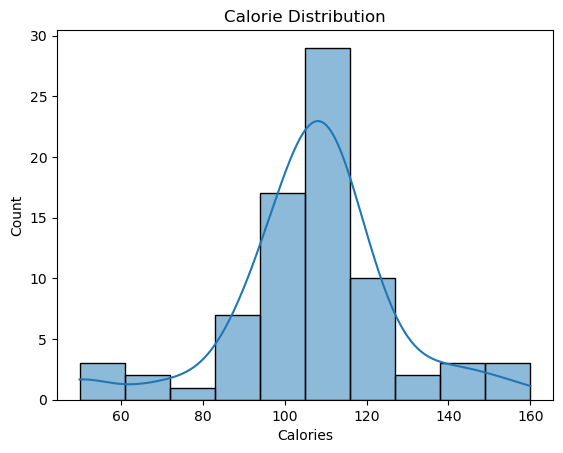

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of calories
sns.histplot(cereals_df['calories'], bins=10, kde=True)
plt.title('Calorie Distribution')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()

In [24]:
import plotly.express as px


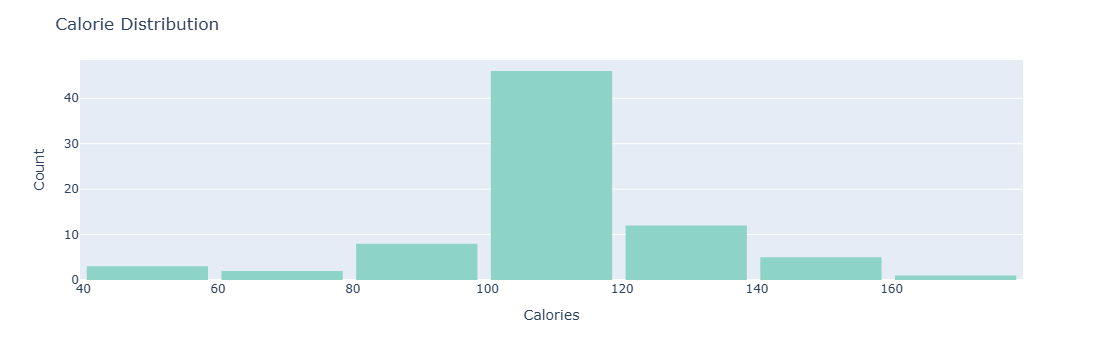

In [38]:
# Create an interactive histogram for calories
fig = px.histogram(cereals_df, x='calories', nbins=10, color_discrete_sequence=px.colors.qualitative.Set3)

# Customize the chart
fig.update_layout(
    title='Calorie Distribution',
    xaxis_title='Calories',
    yaxis_title='Count',
    bargap=0.1,  # Adjust the gap between bars
)

# Show the figure with interactivity
fig.show()

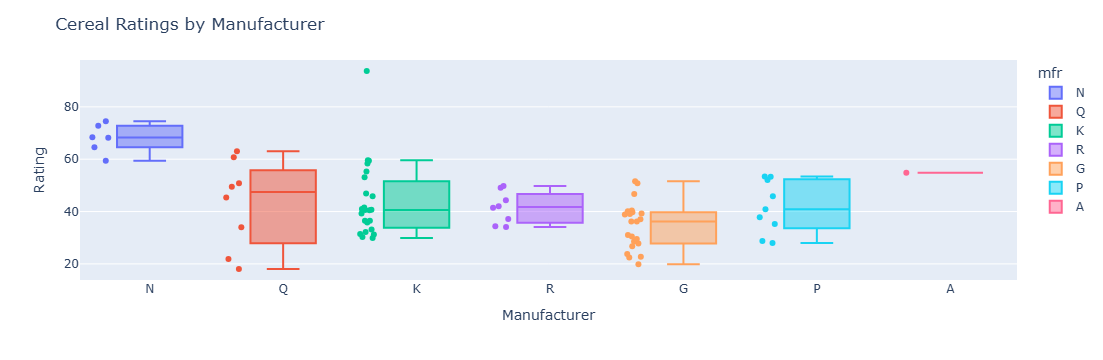

In [56]:
# Create an interactive boxplot with plotly
fig = px.box(cereals_df, x='mfr', y='rating', 
             points="all",  # Show all data points
             color='mfr')  # Color each manufacturer differently

# Customize the layout
fig.update_layout(
    title='Cereal Ratings by Manufacturer',
    xaxis_title='Manufacturer',
    yaxis_title='Rating',
    xaxis_tickangle= 0  # Rotate x-axis labels
)

# Show the figure
fig.show()

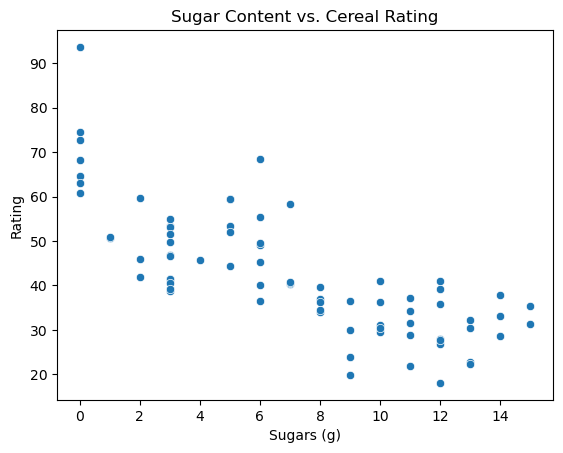

In [58]:
# Scatter plot of sugar content vs. rating
sns.scatterplot(x='sugars', y='rating', data=cereals_df)
plt.title('Sugar Content vs. Cereal Rating')
plt.xlabel('Sugars (g)')
plt.ylabel('Rating')
plt.show()

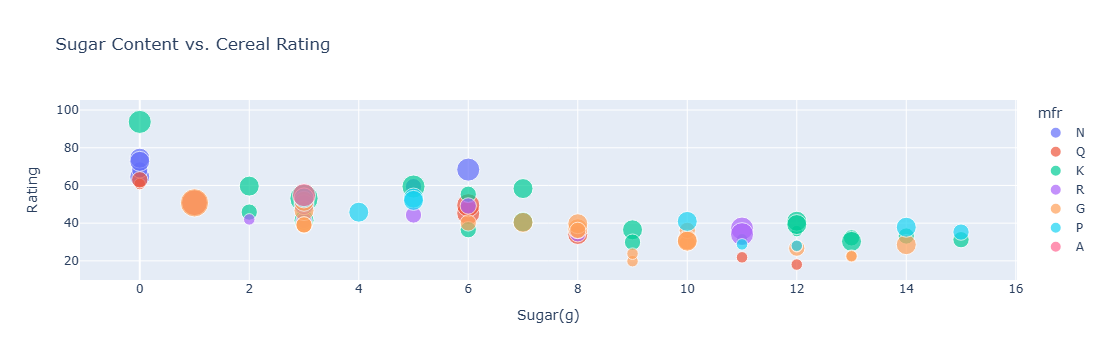

In [60]:
# Create an interactive scatter plot with bubble sizes and data labels
fig = px.scatter(cereals_df, 
                 x='sugars', 
                 y='rating', 
                 size='protein',  # Bubble size based on calories
                 hover_name='name',  # Label each bubble with the cereal name
                 color='mfr',  # Different colors for manufacturers
                 title='Sugar Content vs. Cereal Rating')

# Customize the layout
fig.update_layout(
    xaxis_title='Sugar(g)',
    yaxis_title='Rating',
    title='Sugar Content vs. Cereal Rating'
)

# Show the figure
fig.show()

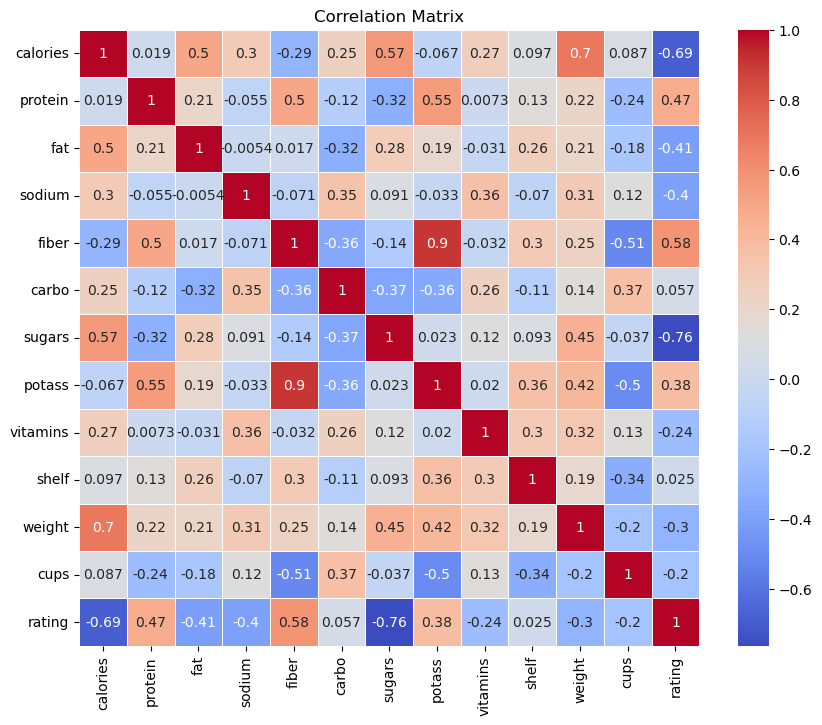

In [64]:
# Select only numeric columns
numeric_cols = cereals_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

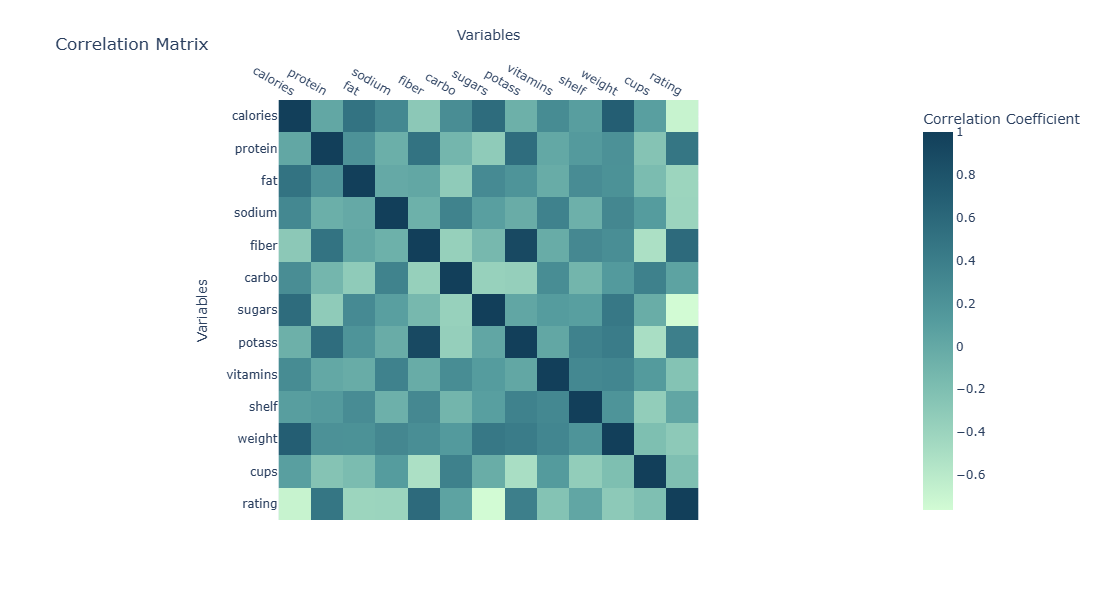

In [72]:
# Select only numeric columns
numeric_cols = cereals_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap using Plotly
fig = px.imshow(
    correlation_matrix,
    color_continuous_scale='darkmint',  # Change to a cool color scale
    title='Correlation Matrix',
    labels=dict(x='Variables', y='Variables', color='Correlation Coefficient')
)

# Update layout to improve aesthetics
fig.update_xaxes(side="top")  # Move x-axis labels to the top
fig.update_layout(
    width=800,
    height=600,
    xaxis_title='Variables',
    yaxis_title='Variables',
)

# Show the figure
fig.show()

C:\Users\jains\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



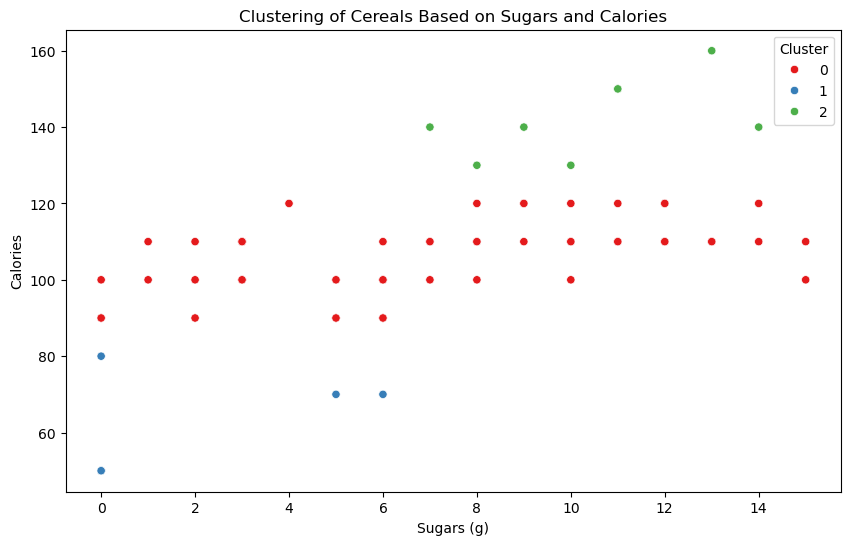

In [80]:
import os

# Set the environment variable to avoid memory leak in KMeans
os.environ["OMP_NUM_THREADS"] = "1"


from sklearn.cluster import KMeans

# Select relevant features for clustering
features = cereals_df[['calories', 'sugars', 'fiber']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cereals_df['cluster'] = kmeans.fit_predict(features)

# Visualize the clustering result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sugars', y='calories', hue='cluster', data=cereals_df, palette='Set1')
plt.title('Clustering of Cereals Based on Sugars and Calories')
plt.xlabel('Sugars (g)')
plt.ylabel('Calories')
plt.legend(title='Cluster')
plt.show()


C:\Users\jains\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



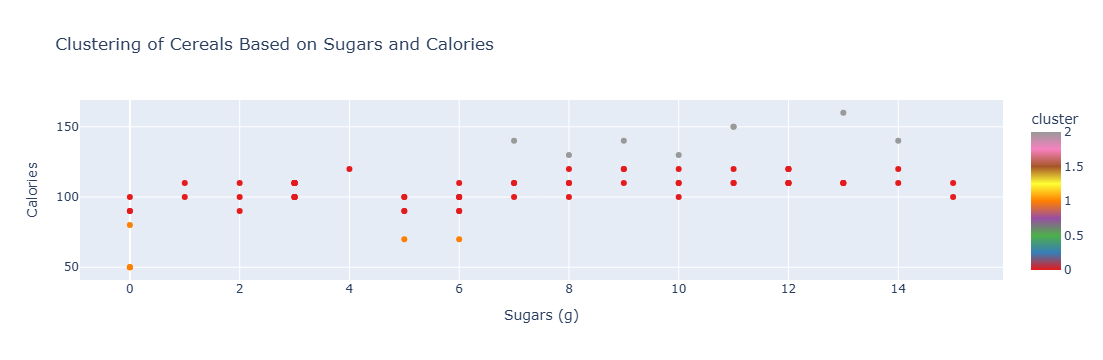

In [84]:
import os
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = cereals_df[['calories', 'sugars', 'fiber']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
cereals_df['cluster'] = kmeans.fit_predict(features)

# Create an interactive scatter plot using Plotly
fig = px.scatter(cereals_df, 
                 x='sugars', 
                 y='calories', 
                 color='cluster', 
                 title='Clustering of Cereals Based on Sugars and Calories',
                 labels={'sugars': 'Sugars (g)', 'calories': 'Calories'},
                 hover_name='name',  # Assuming there's a 'name' column for cereal names
                 color_continuous_scale=px.colors.qualitative.Set1)

# Update layout
fig.update_layout(
    xaxis_title='Sugars (g)',
    yaxis_title='Calories',
)

# Show the figure
fig.show()
